## Decision tree

-> see LAB 7.1

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("../Data/DataWithLocationCleaned.csv.gz")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,6,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,6,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,6,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"(48.905266, -95.314404)"


In [6]:
# checking types
df.dtypes

Port Name    object
State        object
Port Code     int64
Border       object
Date         object
Measure      object
Value         int64
Year          int64
Month         int64
position     object
dtype: object

In [7]:
# correct types and add columns longitude/latitude cleaned
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes


Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Year                  int64
Month                 int64
position             object
dtype: object

In [8]:
df = df[df['Measure'].isin(['Bus Passengers','Pedestrians','Personal Vehicle Passengers','Train Passengers'])]
df = df.reset_index(drop=True)
df.shape


(116131, 10)

In [9]:
df.groupby(['Port Name']).sum().sort_values(['Value'],ascending=False).head()



,Port Code,Value,Year,Month
Port Name,,,,
San Ysidro,2736872,820753587,2193570,7033
El Paso,2709456,813405376,2264184,7260
Laredo,2518272,435119695,2193570,7033
Hidalgo,2519365,406092835,2193570,7033
Calexico,2648174,401463611,2122956,6806


In [10]:
df.shape

(116131, 10)

In [11]:
 df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Year         0
Month        0
position     0
dtype: int64

In [12]:
# check values...
df['Value'].describe()

count    1.161310e+05
mean     5.778344e+04
std      2.366958e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.560000e+02
75%      6.943000e+03
max      4.447374e+06
Name: Value, dtype: float64

In [13]:
total = df.copy()

In [14]:
#df['Value category'], bins = pd.cut(df.Value, retbins = True, right=False, labels = False, bins = 8)

In [15]:
total['quant'] = pd.qcut(df['Value'],q = 8, duplicates = 'drop')
print("intervalls for y:")
print(total['quant'].value_counts())
print()
le = LabelEncoder()
total['y'] = le.fit_transform(total["quant"])

intervalls for y:
(-0.001, 11.0]          43673
(62918.0, 4447374.0]    14516
(6943.0, 62918.0]       14516
(1193.0, 6943.0]        14516
(156.0, 1193.0]         14503
(11.0, 156.0]           14407
Name: quant, dtype: int64



In [16]:
#bins

In [17]:
# check categories...
total.sort_values(['Value'],ascending=False).head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position,quant,y
90369,El Paso,Texas,2402,US-Mexico Border,2001-03-01,Personal Vehicle Passengers,4447374,2001,3,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5
93325,El Paso,Texas,2402,US-Mexico Border,2000-08-01,Personal Vehicle Passengers,4291774,2000,8,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5
90890,El Paso,Texas,2402,US-Mexico Border,2001-02-01,Personal Vehicle Passengers,4281175,2001,2,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5
90034,El Paso,Texas,2402,US-Mexico Border,2001-04-01,Personal Vehicle Passengers,4252128,2001,4,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5
93966,El Paso,Texas,2402,US-Mexico Border,2000-06-01,Personal Vehicle Passengers,4235244,2000,6,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5


In [18]:
total['y'].value_counts()

0    43673
5    14516
4    14516
3    14516
2    14503
1    14407
Name: y, dtype: int64

In [19]:
ports = df['Port Name'].unique()
goods = []
for port in ports:
    if (df[(df['Port Name'] == port) &(df['Value'] != 0)].shape[0]>1100):
        goods.append(port)
print("number of ports : ",len(goods))
print("port names: ", goods)
print("number of observations  ",df[df['Port Name'].isin(goods)].shape[0])


number of ports :  9
port names:  ['Sumas', 'Champlain-Rouses Point', 'Buffalo-Niagara Falls', 'Portal', 'International Falls-Ranier', 'Otay Mesa', 'Eastport_ID', 'Jackman', 'Sweetgrass']
number of observations   10147


Il faut Recréer des intervalles après avoir séléctionner les bons ports.

In [20]:
goodDT = df[df['Port Name'].isin(goods)].reset_index(drop=True)
#df[df['Port Name'].isin(goods)]['Value'].hist(range=[0,500])
goodDT.shape

(10147, 10)

In [21]:
goodDT['quant'] = pd.qcut(goodDT['Value'],q = 8, duplicates = 'drop')
print("intervalls for y:")
print(goodDT['quant'].value_counts())
print()
le = LabelEncoder()
goodDT['y'] = le.fit_transform(goodDT["quant"])

intervalls for y:
(104.0, 250.0]            1274
(-0.001, 104.0]           1271
(126679.25, 2523598.0]    1269
(31294.5, 126679.25]      1268
(8321.75, 31294.5]        1268
(1756.0, 8321.75]         1268
(600.0, 1756.0]           1265
(250.0, 600.0]            1264
Name: quant, dtype: int64



In [22]:
goodDT['y'].value_counts()

1    1274
0    1271
7    1269
6    1268
5    1268
4    1268
3    1265
2    1264
Name: y, dtype: int64

In [23]:
#df['Value in millions'] = (df['Value']/1000000).apply(lambda x: '{:,.2f}'.format(x))

In [26]:
#features but possibly add lat, long, measure
X = total[["Year","Month", "Port Code"]]
y = total["y"]
X.shape

(116131, 3)

In [27]:
X.isnull().sum()

Year         0
Month        0
Port Code    0
dtype: int64

In [28]:
X.head()

,Year,Month,Port Code
0,2019,6,3423
1,2019,6,3423
2,2019,6,3423
3,2019,6,3426
4,2019,6,3426


In [29]:
y = y.astype('int')
y.head()


0    4
1    0
2    1
3    4
4    1
Name: y, dtype: int64

In [30]:
# one-hot encoding for Border
one_hot = OneHotEncoder(categories="auto")
cat_to_onehot = one_hot.fit_transform(df[["Border"]]).toarray()
cat_to_onehot = pd.DataFrame(cat_to_onehot)
cat_to_onehot.shape

(116131, 2)

In [31]:
X = pd.concat((X, cat_to_onehot), axis=1, join='inner').reindex(df.index)

X.shape

(116131, 5)

In [32]:
X.isnull().sum()

Year         0
Month        0
Port Code    0
0            0
1            0
dtype: int64

In [33]:
X.head()

,Year,Month,Port Code,0,1
0,2019,6,3423,1.0,0.0
1,2019,6,3423,1.0,0.0
2,2019,6,3423,1.0,0.0
3,2019,6,3426,1.0,0.0
4,2019,6,3426,1.0,0.0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [38]:
clf = DecisionTreeClassifier(criterion='entropy')

In [39]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
# test accuracy
clf.score(X_test,y_test)

0.33598828949067894

In [42]:
# depth of the decision tree
clf.get_depth()

29

Tuning depth of the tree:

In [43]:
scores = []
for d in range(1, 21):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

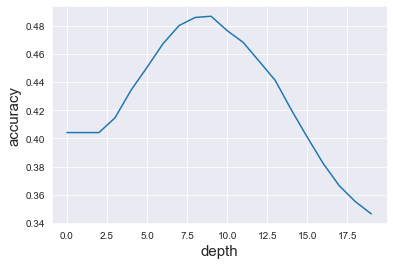

In [44]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [45]:
# best depth
np.argmax(scores)

9

Feature importance

In [273]:
# feature importances for best classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
clf.feature_importances_

array([0.04629746, 0.        , 0.95370254, 0.        , 0.        ])

In [274]:
sorted(zip(X_train.columns, clf.feature_importances_), key=lambda x: x[1], reverse=True)

[('Port Code', 0.9537025440169418),
 ('Year', 0.04629745598305822),
 ('Month', 0.0),
 (0, 0.0),
 (1, 0.0)]

Visualizing the decision tree

In [275]:
!pip install pydotplus
!pip install graphviz

     |████████████████████████████████| 286kB 2.7MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24568 sha256=546e23e0df5170d04e9f5d52e983d97e46d7ea759222346613e371dc6540699a
  Stored in directory: /Users/tanjamarkotic/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [277]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(export_graphviz(clf, out_file=None
   , feature_names=X_train.columns, class_names=['No', 'Yes'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH